# *Predicting* **Species**
using famous iris dataset

**Data Set Information:**

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

**Predicted attribute:** class of iris plant.



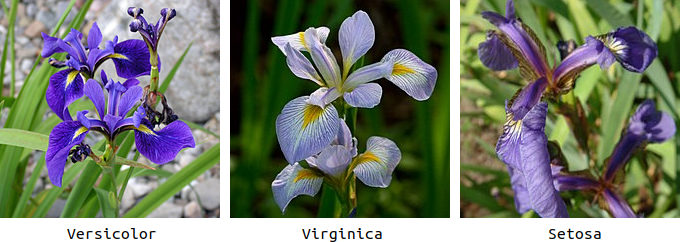

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors , datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = pd.read_csv('iris.csv')

feature_names = iris.iloc[0:4]
target_names = iris.iloc[5]

X = iris.iloc[:,:4]
y = iris.iloc[:,-1:]
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
       species
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[150 rows x 1 columns]


In [13]:
import seaborn as sns
plt.style.use('ggplot')
sc = StandardScaler()
#X_scaled = sc.fit_transform(X[['sepal_length','sepal_width','petal_length','petal_width']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

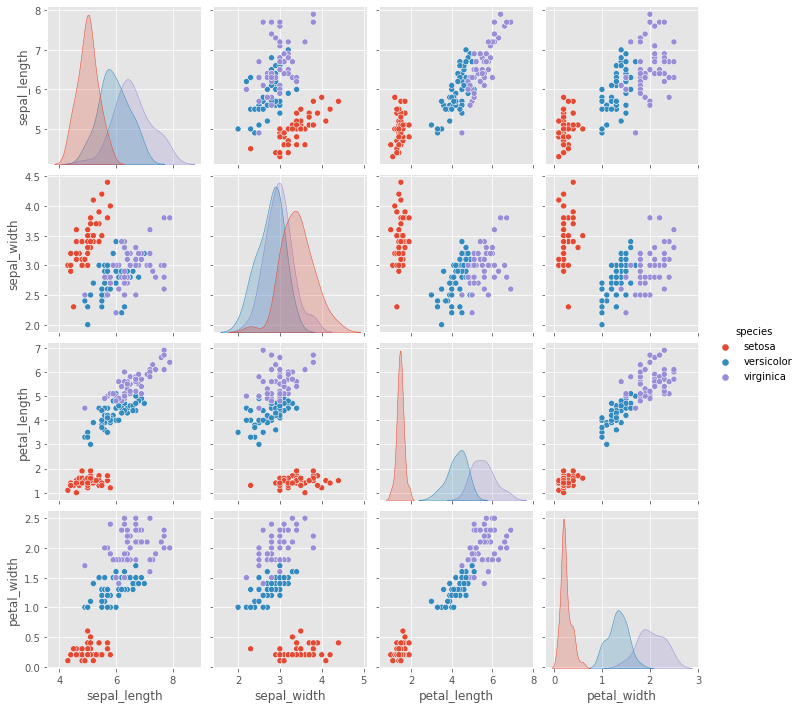

In [4]:
sns.pairplot(iris,hue = 'species')

#### The **12th plot** in pairplot shows some significant groups developing when parameter are chosen as **petal_width and petal_length**

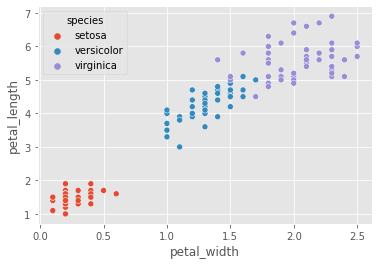

In [5]:
sns.scatterplot(x = iris['petal_width'] , y = iris['petal_length'],hue = iris.species)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')
clf5 = neighbors.KNeighborsClassifier(n_neighbors = 6)
#clf.fit(X[['sepal_length','sepal_width','petal_length','petal_width']],
       # y.species)

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

### Having look on decision boundaries made by classifier :
#### **0.Setosa**
#### **1.Versicolor**
#### **2.Verginica**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

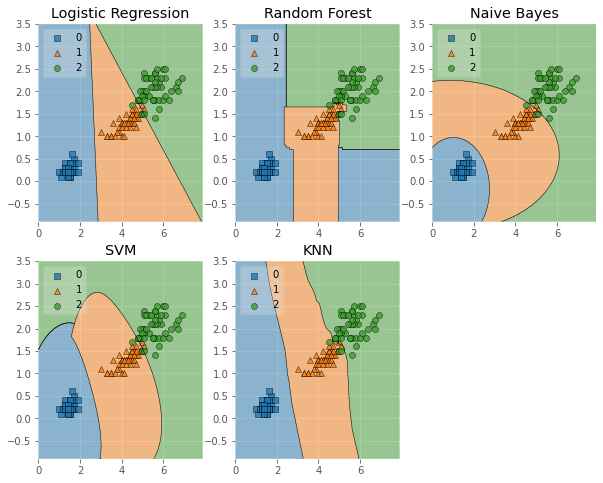

In [7]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM','KNN']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4,clf5],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

##  Selecting **KNeigborsClassifier** as model

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


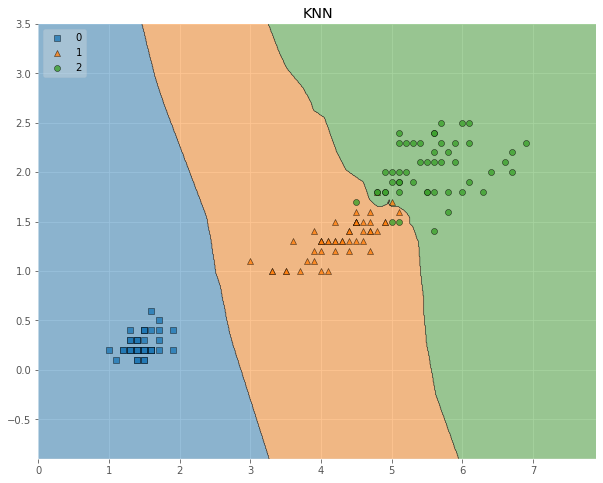

In [8]:
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=clf5, legend=2)
plt.title('KNN')
plt.show()

### **Tesing model prediction on sample data**

In [9]:
final = np.array([[3,5],[3,1],[2,1],[3.3,2.2],[0.1,0.1],[5,1.69]])
clf5.predict(final)

array([2, 1, 0, 1, 0, 2])

###  **Saving our model in .pkl format**

In [14]:
import pickle
filename = 'iris_model.sav'
pickle.dump(clf5, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9666666666666667


#### *Great ! this model did a* **nice classification work** *of predicting with* **score of 96.666%**